# Predição de Solubilidade usando ferramentas de *Data Science*

<img src="https://github.com/rrodrigues345/solubility/blob/main/img/ds-banner-1100x200.jpeg?raw=true" alt="Banner" style="width:100%;">





# 1. Instalando o RDKIT

 o RDKit é uma biblioteca de química computacional escrita em C++ com interfaces para Python. Ele fornece uma ampla variedade de ferramentas e algoritmos para trabalhar com informações químicas e é amplamente utilizado em áreas como química medicinal, ciência de dados químicos e modelagem molecular.

A interface Python do RDKit torna mais fácil para os cientistas e pesquisadores realizar tarefas relacionadas à manipulação, análise e visualização de estruturas moleculares usando a linguagem de programação Python. Isso inclui a leitura e escrita de arquivos de moléculas, cálculos de descritores moleculares, busca por subestruturas, análise de similaridade molecular, e muito mais.

Existem várias formas de instalar o RDKIT, mas uma que é bem simples é instá-lo via `pip`, disponível nos repositórios do ubuntu.

O `pip` é uma ferramenta de gerenciamento de pacotes para Python. Ele é usado para instalar e gerenciar bibliotecas e pacotes adicionais que estendem as funcionalidades do Python. O nome "pip" é uma recursão humorística que significa "Pip Installs Packages" (Pip Instala Pacotes).

In [42]:
%pip install rdkit

### **Observações** | Comandos

- O `%` (percentual) no código que usamos acima é uma sintaxe específica do **Jupyter Notebook/Colab** e do ambiente **IPython**. Esse formato é conhecido como ***magic command*** e é usado para fornecer funcionalidades especiais no contexto do **IPython/Jupyter/Colab**.

- Uma outra forma mais consistente de instalar é usar `!` antes do comando.  Isso é conhecido como ***comando shell*** ou ***subcomando shell*** e permite que você execute comandos do sistema operacional diretamente da célula do notebook.

- Quando você coloca `!` antes de um comando em um script, o shell interpreta isso como uma instrução para executar o comando diretamente no shell, como se você o digitasse no terminal. E é dessa forma que vamos proceder sempre que precisarmos usar algum comando *unix* nos notebooks.

### Descobrindo em qual versão do ubuntu o google colab está rodando









In [43]:
! cat /etc/issue.net

Ubuntu 22.04.3 LTS


# 2. Datasets de Solubilidade

Existem várias abordagens quanto ao acesso aos dados. Podemos utilizar o link diretamente do site do periódico onde o artigo foi publicado ou armazenar uma cópia em um repositório seu, disponível publicamente, como se fosse um *backup* destes dados caso saia do ar futuramente.

Recomendo esta segunda abordagem. Para isso, criei um repositório público no github:
- https://github.com/rrodrigues345/solubility

Os arquivos que iremos utilizar estão disponíveis neste repositório, na pasta `data`:
- `solubility/data/`

Para obter os links, clique em cima do arquivo que você anexou no repositório e procure o link *raw*:
- https://github.com/rrodrigues345/solubility/raw/main/data/ci034243xsi20040112_053635.txt

e

- https://github.com/rrodrigues345/solubility/raw/main/data/delaney.csv


Vamos importar estes arquivos direto do nosso repositório no GitHub para a pasta do usuário que você está usando no Google Colab.

Feito isso, vamos fazer o Download dos arquivos necessários utilizando o comando Unix, `wget`:

In [44]:
url='https://github.com/rrodrigues345/solubility/raw/main/data'
!wget $url/ci034243xsi20040112_053635.txt
!wget $url/delaney.csv

--2023-12-29 12:44:25--  https://github.com/rrodrigues345/solubility/raw/main/data/ci034243xsi20040112_053635.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rrodrigues345/solubility/main/data/ci034243xsi20040112_053635.txt [following]
--2023-12-29 12:44:26--  https://raw.githubusercontent.com/rrodrigues345/solubility/main/data/ci034243xsi20040112_053635.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K) [text/plain]
Saving to: ‘ci034243xsi20040112_053635.txt.1’

ci034243xsi20040112 100%[===================>]  58.63K  --.-KB/s    in 0.007s  

2023-12-29 12:44:26 (8.16 MB/s) - ‘c

In [45]:
# Verificando que os arquivos foram baixados:
!ls --color  # o parâmetro color destaca de diferentes cores
             # arquivos, pastas, executáveis, etc.

ci034243xsi20040112_053635.txt    delaney.csv    sample_data
ci034243xsi20040112_053635.txt.1  delaney.csv.1


O próximo passo é ler os arquivos. Veja que o arquivo **delaney.csv** é uma planilha, no estilo *comma-separated-value => .csv*

In [46]:
!head -n 5 delaney.csv
!echo "-------------------------"
!wc -l delaney.csv # conta o número de linhas em um arquivo de texto.

Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
"1,1,1-Trichloroethane",-2,-2.232,CC(Cl)(Cl)Cl
"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
-------------------------
1145 delaney.csv


O comando `head` mostra as 5 primeiras linhas (parâmetro `-n 5`) do arquivo. Para ver o arquivo completo, vc pode usar o comando `cat delaney.csv`, mas não recomendo porque o arquivo tem 1.145 linhas!  

Agora, vamos visualizá-lo na forma de uma planilha. Para isso, usamos a Biblioteca `pandas`.

Ela fornece estruturas de dados de alto desempenho e fáceis de usar, assim como ferramentas de análise de dados. O Pandas é especialmente útil para manipulação e análise de dados tabulares, como planilhas ou bancos de dados SQL.

Exatamente o que precisamos!

In [47]:
import pandas as pd

Estamos carregando a biblioteca `pandas` para dentro do nosso código e a renomeando como `pd`. Essa é uma prática comum para encurtar o nome da biblioteca e facilitar o uso ao longo do código.

Agora, vamos ler nosso arquivo .csv usando o pandas:

In [48]:
tabela = pd.read_csv('delaney.csv')

O `pd.read_csv` é uma função específica do `pandas` que é usada para ler dados de um arquivo `.csv` e criar um `DataFrame`.

Um `DataFrame` é uma estrutura de dados bidimensional que pode ser considerada semelhante a uma tabela. Em muitos contextos, especialmente na análise de dados com bibliotecas como `pandas` em `Python`, `R`, ou `Spark`, o termo "`DataFrame`" é frequentemente usado para descrever uma tabela de dados organizada em linhas e colunas.

Para visualizar a tabela, basta chamá-la pelo nome. Neste caso: `tabela`

In [49]:
tabela

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


Compare com o arquivo `.csv` visualizado com o comando `head`, mais acima, e veja que é o mesmo conteúdo, porém agora estruturado na forma de uma tabela.

As estruturas químicas são codificadas por uma sequência de texto conhecida como `SMILES` (*Simplified Molecular-Input Line-Entry System*), que é um acrônimo para Sistema Simplificado de Entrada de Linha Molecular, que tem por objetivo compor a estrutura química da molécula em uma forma 1D.

Para acessar somente uma coluna, basta chamála também, como um objeto. Ao usar `tabela.SMILES`, você está acessando a coluna `SMILES` dessa tabela como se fosse um objeto:

In [50]:
tabela['Compound ID'][1141]

'Warfarin'

In [51]:
tabela.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

Usando a biblioteca `pandas`, quando você acessa uma coluna de um `DataFrame`, como a coluna `SMILES`, você está manipulando uma **Série pandas**. Para acessar elementos específicos dentro dessa Série (ou coluna), você pode usar índices:

In [52]:
molecula_na_primeira_linha = tabela.SMILES[0]
print(molecula_na_primeira_linha)
m01 = molecula_na_primeira_linha #posso criar outra variável de nome menor.
print(m01)

ClCC(Cl)(Cl)Cl
ClCC(Cl)(Cl)Cl


In [53]:
from rdkit import Chem

Agora vamos criar um objeto relativo à molécula 1:

In [54]:
molec01 = Chem.MolFromSmiles(m01)

Para imprimir na tela, basta chamar este objeto:

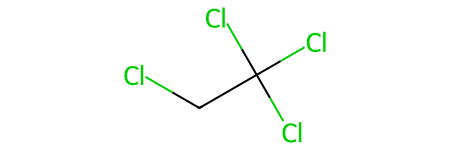

In [55]:
molec01

Vamos visualizar a molécula:

In [56]:
from rdkit.Chem import Draw

 Quando usamos `import Draw` estamos importando a `classe` `Draw` do submódulo `Chem` do `RDKit`. Esta classe contém funcionalidades para desenhar moléculas e estruturas químicas.

 Isso permite que você use funções específicas, como `Draw.MolToImage()`, que converte uma molécula `RDKit` em uma imagem que pode ser exibida ou manipulada

Chamamos `MolToImage`, que é uma função que converte um objeto `Mol` em uma imagem. Neste caso, `molec01` é convertido em uma imagem.

A variável `m01picture` vai  conter então, a representação gráfica da estrutura molecular da molécula 1.

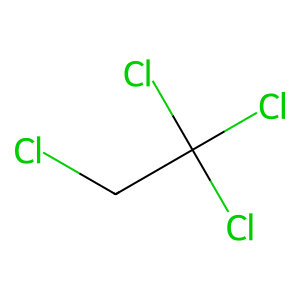

In [57]:
m01picture = Draw.MolToImage(molec01)
m01picture

Imagem do Tetracloreto de Etano

# 3 Calculando descritores moleculares usando o `rdkit`

In [58]:
from rdkit import Chem

*Para* calcular os descritores, vamos transformar nossa coluna que contém os smiles em uma lista:

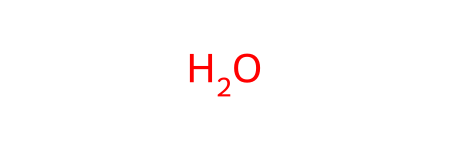

In [59]:
Chem.MolFromSmiles('O')

In [60]:
molecules = []
for smiles in tabela.SMILES:
  molecule = Chem.MolFromSmiles(smiles)
  molecules.append(molecule)

In [61]:
print(molecules[0])

In [62]:
len(molecules)

1144

In [63]:
molecules[:5] # mostra os 5 primeiros objetos do array.

Para prever o **LogS** (log da solubilidade aquosa), o estudo de Delaney utiliza 4 descritores moleculares:

- **cLogP** (Coeficiente de partição octanol-água)
- **MW** (Peso molecular)
- **RB** (Número de ligações rotacionais)
- **AP** (Proporção aromática = número de átomos aromáticos / número total de átomos pesados)

Com o uso do `rdkit` conseguimos calcular os 3 primeiros descritores. Já para o cálculo da proporção aromática, teremos que fazer manualmente.


## 3.2.1. LogP, MW e RB

Para o cálculo destes descritores precisamos importar os módulos necessários:
- `numpy` é uma biblioteca para computação numérica em Python.

- Importamos a classe `Descriptors` do módulo `rdkit.Chem`. Essa classe fornece uma série de descritores moleculares pré-implementados que podem ser usados para caracterizar moléculas.

In [64]:
import numpy as np
from rdkit.Chem import Descriptors

## Criando uma função para calcular os descritores

Em seu tutorial, Chanin Nantasenamat utiliza uma função inspirada em um artigo da Code Ocean. Vamos utilizar a mesma função, detalhando os pontos principais na seção "Entendendo o Código".

In [65]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def calcular_descritores_moleculares(smiles):

    molData = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        molData.append(mol)

    baseData= np.arange(1,1)
    i = 0
    for mol in molData:

        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i+1

    columnNames = ["MolLogP","MolWt","RBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

### Entendendo o código:


- O código define uma função chamada `calcular_descritores_moleculares`, que aceita uma lista de `SMILES` como entrada.
- Essa função utiliza a biblioteca `RDKit` para converter os `SMILES` em objetos moleculares (`Mol`) e, em seguida,
- calcula três descritores moleculares para cada molécula:
  - `MolLogP` (Coeficiente de partição octanol-água),
  - `MolWt` (Peso molecular) e
  - `NumRotatableBonds` (Número de ligações rotacionáveis).

Se formos armazenar o resultado do cálculo dos descritores na variável `descritores_calculados`, alimentaríamos a função da seguinte forma: `descritores_calculados = calcular_descritores_moleculares(tabela_solubilidade.SMILES)`

A primeira parte da função, `def calcular_descritores_moleculares(smiles)` aceita uma lista contendo moléculas no formato smiles (que é o que temos até o momento em `tabela_solubilidade.SMILES`.

- Um *loop* percorre cada `SMILES` na lista convertendo-o em um objeto `RDKit Mol` usando `Chem.MolFromSmiles`. Os objetos `Mol` são armazenados em uma lista chamada `molData`.

```
    molData = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        molData.append(mol)
```

Na segunda parte do código desta função, é criada uma matriz vazia, de nome `baseData`, usando `np.arange(1,1)`.

- A expressão `np.arange(1, 1)` cria um `array` `NumPy` vazio. A função `arange` em `NumPy` gera uma sequência de números espaçados uniformemente dentro de um intervalo especificado.

- No caso de `np.arange(1, 1)`, os argumentos são `start` (início) e `stop` (parada). No entanto, como o valor inicial é igual ao valor final (1), não há nenhum número no intervalo. Portanto, a função gera um `array` vazio.

- Isso é feito somente para iniciar a variável `baseData`. Durante o *loop* os resultados dos descritores são adicionados à esta variável usando a função `np.vstack`.

```
baseData= np.arange(1,1)
    i = 0  
    for mol in molData:        

        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   

        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i+1
```
- `np.vstack` empilha verticalmente os `arrays` para formar uma matriz 2D (`baseData`). No caso da primeira iteração (quando `i` é 0), `baseData` é inicializado com o `array` `row`. Nos *loops* subsequentes, novas linhas são adicionadas empilhando-as sobre `baseData`.
  - A variável `i` é usada para verificar se é a primeira iteração. Se for, inicializa `baseData`, se não for a primeira iteração, empilha.

Na última parte do código, os dados são organizados em um `DataFrame` do pandas (`descriptors`), onde cada coluna representa um descritor calculado. Este `DataFrame` é retornado pela função (`return descriptors`):
```
    columnNames = ["MolLogP","MolWt","RBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
```



In [66]:
!du -sh *

60K	ci034243xsi20040112_053635.txt
60K	ci034243xsi20040112_053635.txt.1
60K	delaney.csv
60K	delaney.csv.1
55M	sample_data


### Criando a tabela com os descritores já calculados

In [67]:
tabela_mw_logp_rb = calcular_descritores_moleculares(tabela.SMILES)
tabela_mw_logp_rb

,MolLogP,MolWt,RBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


## 3.2.2. Cálculo da proporção aromática (*Aromatic Proportion* - AP)

*   List item
*   List item



Para calcular AP, precisamos obter o número total de átomos aromáticos para cada molécula.

Primeiro, começamos calculando para uma única molécula:

m =

In [68]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

Vamos visualizar a estrutura da molécula:

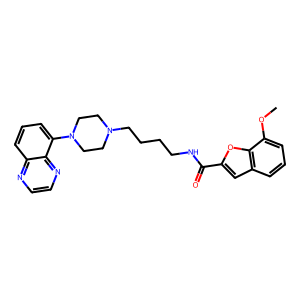

In [69]:
Draw.MolToImage(m)

In [70]:
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

### def AtsAromaticos(m)

Agora, criamos um função para contar o número de ocorrências de `True`, que indicaria a presença de átomos aromáticos:

In [71]:
#Bora lá!
def AtsAromaticos(m):
  atomos_aromaticos = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  tt_ats_aromaticos = 0
  for i in atomos_aromaticos:
    if i == True:
      tt_ats_aromaticos += 1
  return tt_ats_aromaticos


In [72]:
AtsAromaticos(molecules[10])

6

Agora que sabemos como contar para uma única molécula, vamos fazer um outro for, para contar todas as moléculas. Seria um `for` dentro de outro `for`, mas estamos fazendo aos poucos.

#### Loop FOR
A estrutura do *loop* `for` em python é bem flexível e permite você iterar sobre qualquer item iterável e também modificá-lo no meio do processo. A sintaxe do *loop for* é a seguinte:

```python
for variavel in sequencia:
    # bloco de código
```

É dessa forma resumimda mesmo, sem `end` ou nenhuma outra estrutura. Apenas a indentação do bloco de código que será executado no *loop*.

Sabendo disso, vamos fazer um *loop* para contar o total de átomos aromáticos para o cálculo de nosso "Descritor de átomos aromáticos". O que vamos fazer é armazenar o somatório de átomos aromáticos para cada molécula em uma lista, que conterá apenas este valor. Chamaremos esta lista de `Lista_de_AtsAromaticos`:

In [73]:
#Inicializamos a lista, vazia:
Lista_de_AtsAromaticos = []

# Para cada molécula da lista de moléculas (18), calcule o total de átomos aromáticos.
for molec in molecules:
  resultado = AtsAromaticos(molec)
  Lista_de_AtsAromaticos.append(resultado)
Lista_de_AtsAromaticos

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [74]:
print(Lista_de_AtsAromaticos)

[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 0, 0, 6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 10, 6, 6, 0, 6, 6, 6, 6, 10, 6, 0, 10, 0, 14, 0, 0, 14, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 10, 14, 6, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 12, 12, 12, 12, 0, 0, 12, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 12, 6, 6, 12, 12, 6, 0, 6, 12, 6, 6, 6, 6, 0, 0, 10, 0, 6, 12, 12, 6, 12, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 12, 12, 6, 10, 6, 6, 6, 12, 10, 14, 10, 10, 0, 6, 0, 0, 0, 0, 6, 12, 0, 10, 6, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 10, 6, 0, 0, 0, 0, 10, 6, 0, 6, 10, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 10, 0, 0, 14, 6, 0, 0, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 12, 6, 6, 6, 12, 6, 12, 6, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 9, 0, 6, 0, 12, 0, 0, 12, 12, 12, 6,

### (PA) Proporção Aromática - *(Aromatic Proportion - AP)*

In [75]:
# Calculando para uma molécula apenas:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AtsAromaticos(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

In [76]:
AtsAromaticos(molecules[10])/Descriptors.HeavyAtomCount(molecules[10])

0.6

In [77]:
# Calculando para o Dataset inteiro:
AP = []
for molec in molecules:
  result = AtsAromaticos(molec)/Descriptors.HeavyAtomCount(molec)
  AP.append(result)

In [78]:
AP

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [79]:
#df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
#df_desc_AromaticProportion

In [80]:
tabela_ap = pd.DataFrame(AP,columns=['AP'])
tabela_ap

,AP
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


___
# Referências:
- Chanin Nantasenamat: Data Professor YouTube channel, http://youtube.com/dataprofessor
- https://github.com/dataprofessor/code/blob/master/python/cheminformatics_predicting_solubility.ipynb


# SPIN-OFFs

Podemos imprimir outra molécula, por exemplo, a Varfarina. Quando exibimos a tabela pela primeira vez, ele mostra linhas do ínicio e fim desta tabela. E assim, é possível ver que a varfarina está na linha 1141:

In [81]:
warfarin = tabela.SMILES[1141]
warfarin

'CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O '

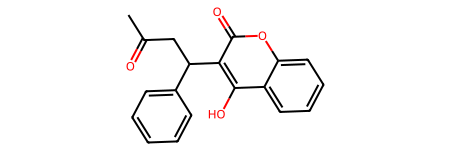

In [82]:
Chem.MolFromSmiles(warfarin)

A varfarina é um fármaco do grupo dos anticoagulantes. É comumente usado para prevenir coágulos sanguíneos, como trombose venosa profunda e embolia pulmonar, e para prevenir o acidente vascular cerebral em pessoas com fibrilação atrial ou valvopatia.

Veja que somente executamos o comando `Chem.MolFromSmiles(warfarin)`, mas podemos armazená-lo em uma variável.

Aqui vamos usar uma pŕatica comum na programação que é reatribuir a variável.

Vamos reatribuir a variável `warfarin` este novo valor, e quando chamarmos esta variável, conterá a informação em mol da molécula.

In [83]:
warfarin_mol = Chem.MolFromSmiles(warfarin)

In [84]:
warfarin

'CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O '

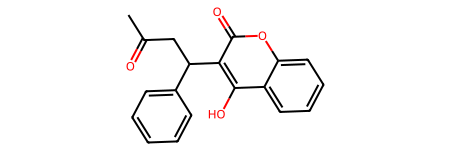

In [85]:
warfarin_mol

Para transformar em uma imagem, a mesma coisa:

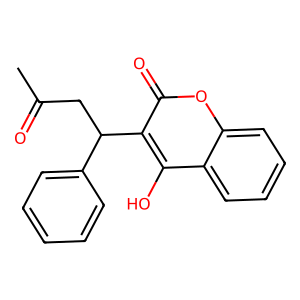

In [86]:
warfarin_img = Draw.MolToImage(warfarin_mol)
warfarin_img

## Obtendo uma imagem png, de fundo transparente da estrutura química

Para isso, vamos usar a biblioteca Pillow (`PIL`), que fornece suporte para manipulação de imagens em Python.

Podemos instalá-la usando o pip. Para ver se a biblioteca já está instalada, use o comando show: `!pip show pillow`. Caso contrário, instale com o comando: `!pip install pillow`

In [87]:
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from PIL import Image

# Supondo que 'warfarin_mol' seja um objeto RDKit Mol válido
warfarin_img = Draw.MolToImage(warfarin_mol, kekulize=False)

# Convertendo para RGBA para suportar transparência
warfarin_img = warfarin_img.convert('RGBA')

# Criando uma nova imagem com fundo transparente
transparent_bg = Image.new('RGBA', warfarin_img.size, (255, 255, 255, 0))

# Compondo as imagens
result_img = Image.alpha_composite(transparent_bg, warfarin_img)

# Salvando a imagem em um arquivo (por exemplo, formato PNG suporta transparência)
# result_img.save('warfarin_image.png', 'PNG')
